# Data Visualization

In [1]:
import geopandas as gpd #Library for using Geospatial Dataframes
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns #Library for Data Vizualisation
import pandas as pd

In [2]:
data = pd.read_csv("data/clean_data.csv")

## Light Conditions

###### NOT: Yoğunluğa göre bakılabilir

<Axes: xlabel='Light_Conditions', ylabel='count'>

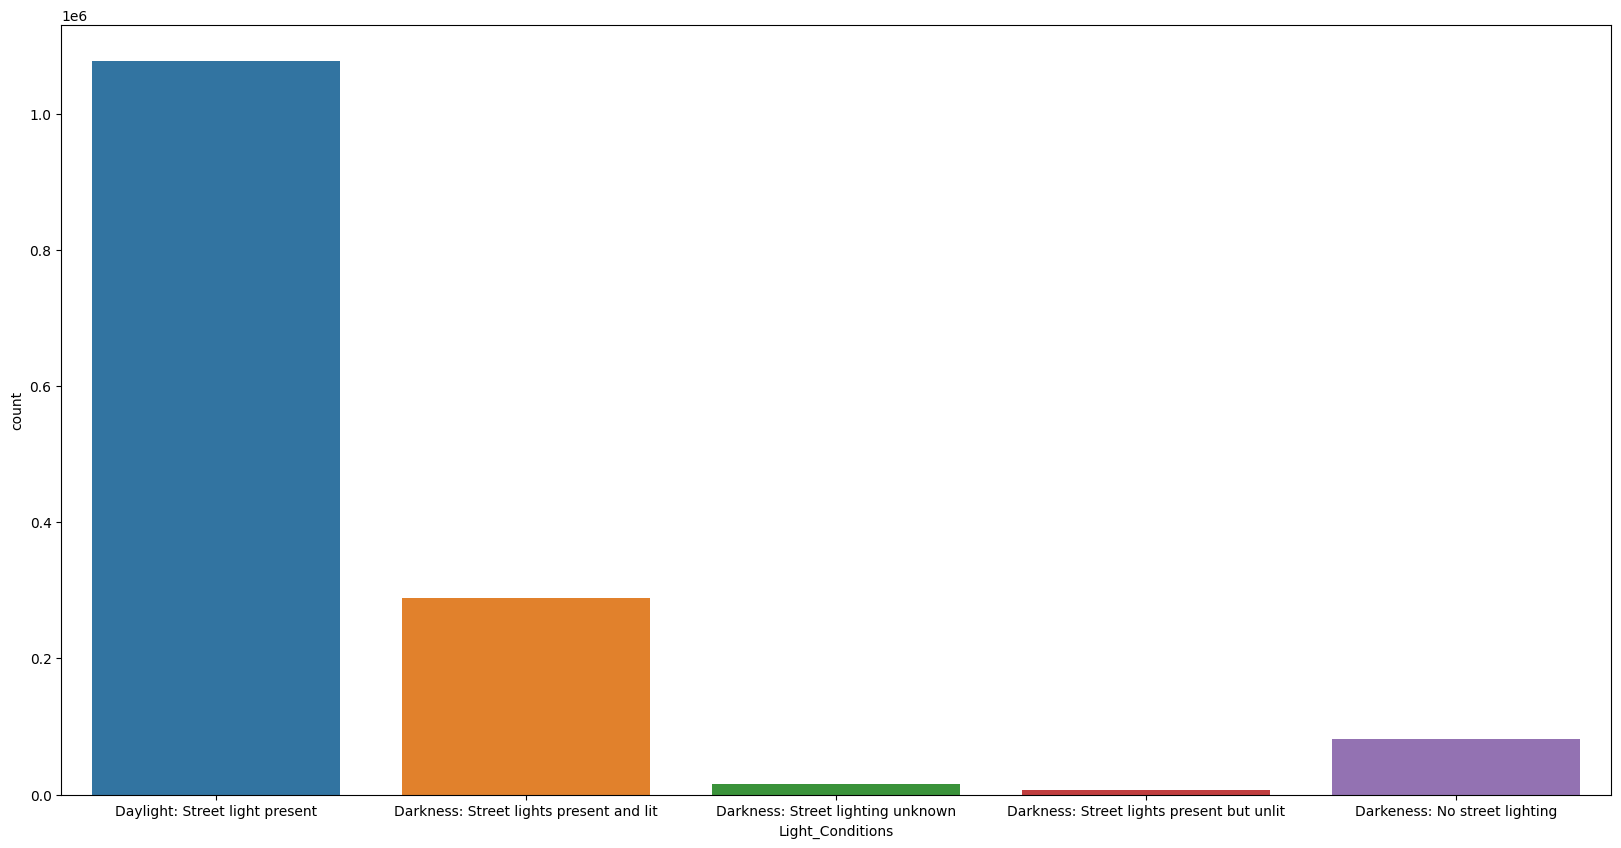

In [3]:
plt.figure(figsize=(20,10))
sns.countplot(
    data,x="Light_Conditions",
    hue="Light_Conditions", 
    legend=False)

## Weather Conditions

<Axes: xlabel='Weather_Conditions', ylabel='count'>

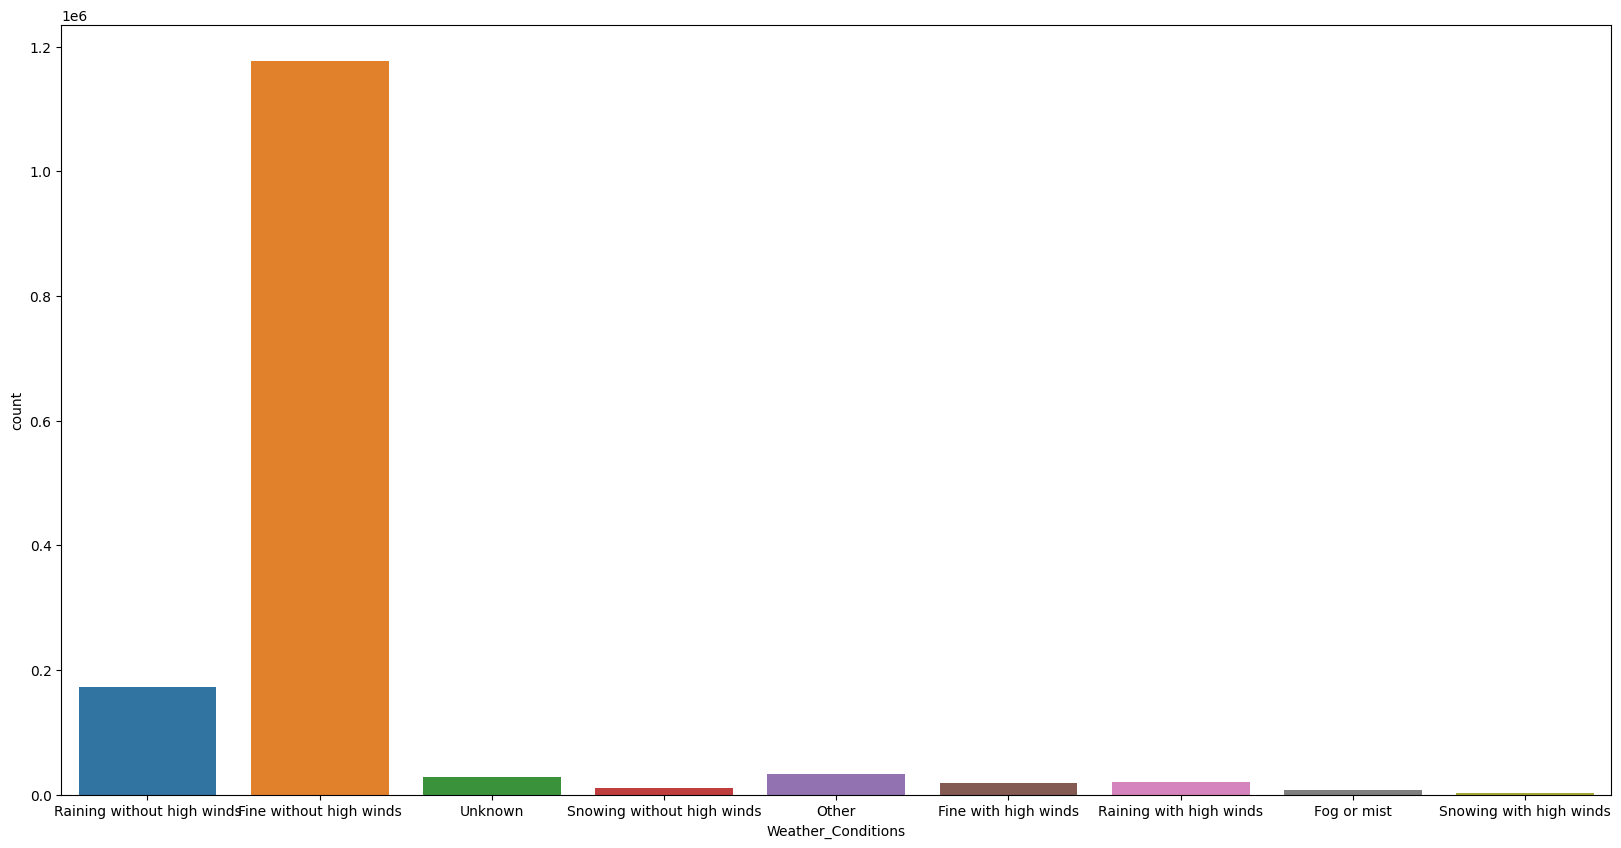

In [4]:
plt.figure(figsize=(20,10))
sns.countplot(
    data,
    x="Weather_Conditions", 
    hue="Weather_Conditions", 
    legend=False)

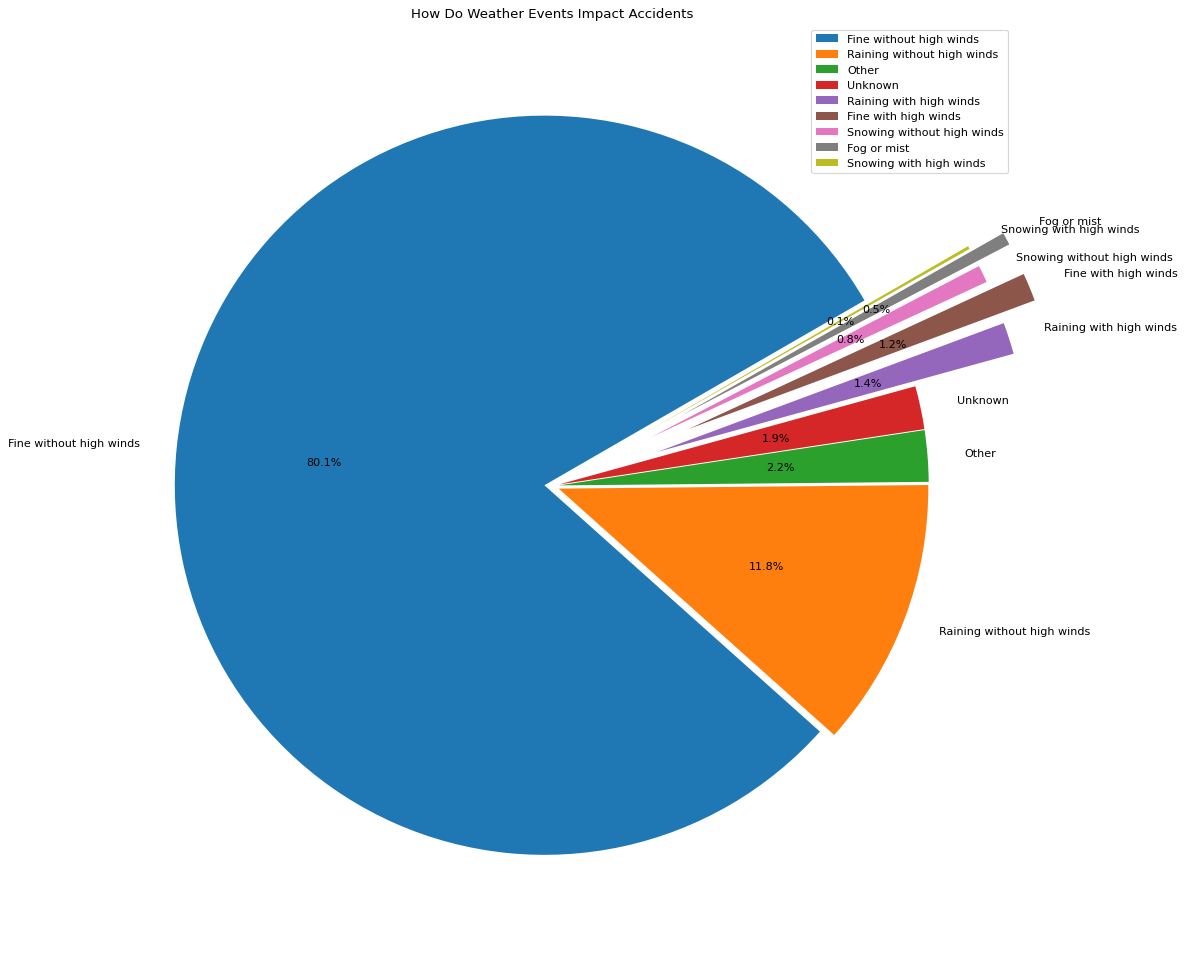

In [5]:
weather_cond = data["Weather_Conditions"].value_counts()

figure(
    figsize=(15, 15), 
    dpi=80)

plt.pie(
    weather_cond.values, 
    labels = weather_cond.index, 
    colors = sns.color_palette(),
    startangle = 30,
    textprops={'size': 'medium'},
    explode=(0.02,0.02,0.02,0.02,0.3,0.4,0.3,0.4,0.3),
    autopct="%1.1f%%")
plt.legend()
plt.title("How Do Weather Events Impact Accidents")
plt.show()

## Road Conditions

<Axes: xlabel='Road_Surface_Conditions', ylabel='count'>

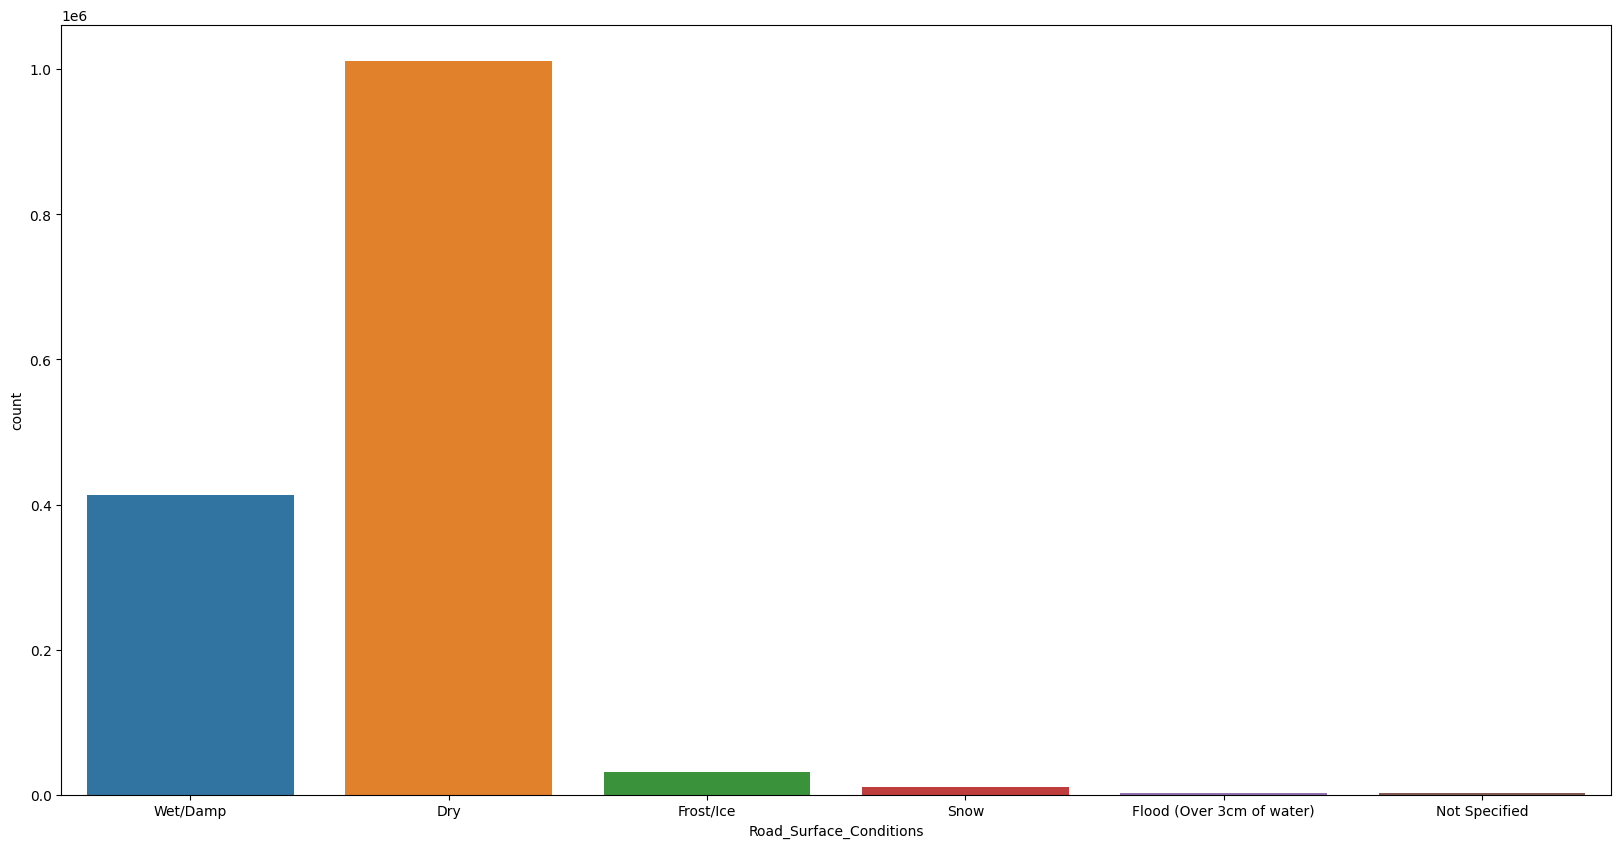

In [6]:
plt.figure(figsize=(20,10))
palette = ["r","g","b","orange","purple"]
sns.countplot(
    data,x="Road_Surface_Conditions",
    hue="Road_Surface_Conditions", 
    legend=False)

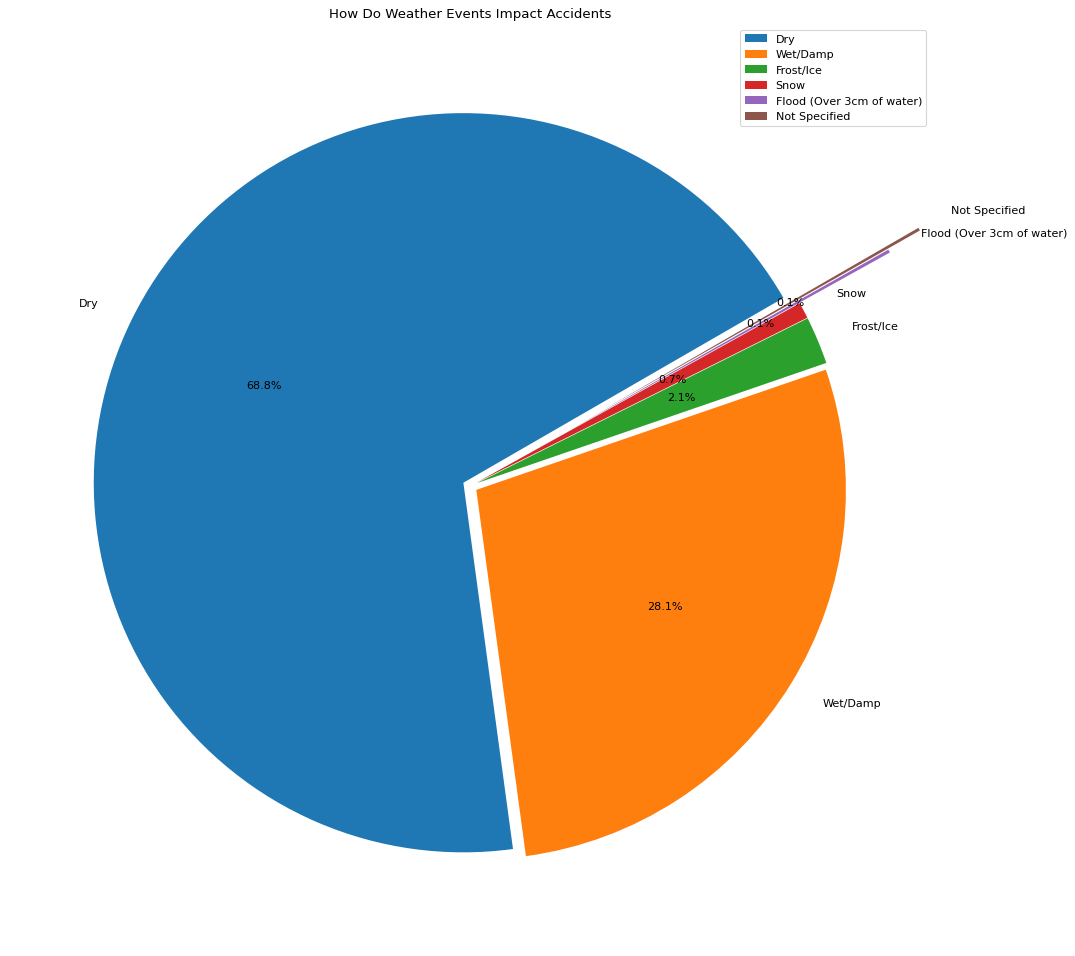

In [7]:
road_cond = data["Road_Surface_Conditions"].value_counts()

figure(
    figsize=(15, 15), 
    dpi=80)

plt.pie(
    road_cond.values, 
    labels = road_cond.index, 
    colors = sns.color_palette(),
    startangle = 30,
    textprops={'size': 'medium'},
    explode=(0.02,0.02,0.02,0.02,0.3,0.4),
    autopct="%1.1f%%")
plt.legend()
plt.title("How Do Weather Events Impact Accidents")
plt.show()

## Accidents Severity

In [8]:
mappings = {
    1:"Killed",
    2:"Serious", 
    3:"Slight"
}
data_copy = data.copy()

data_copy['Accident_Severity_Index'] = data_copy["Accident_Severity"].map(mappings)

<Axes: xlabel='Accident_Severity', ylabel='count'>

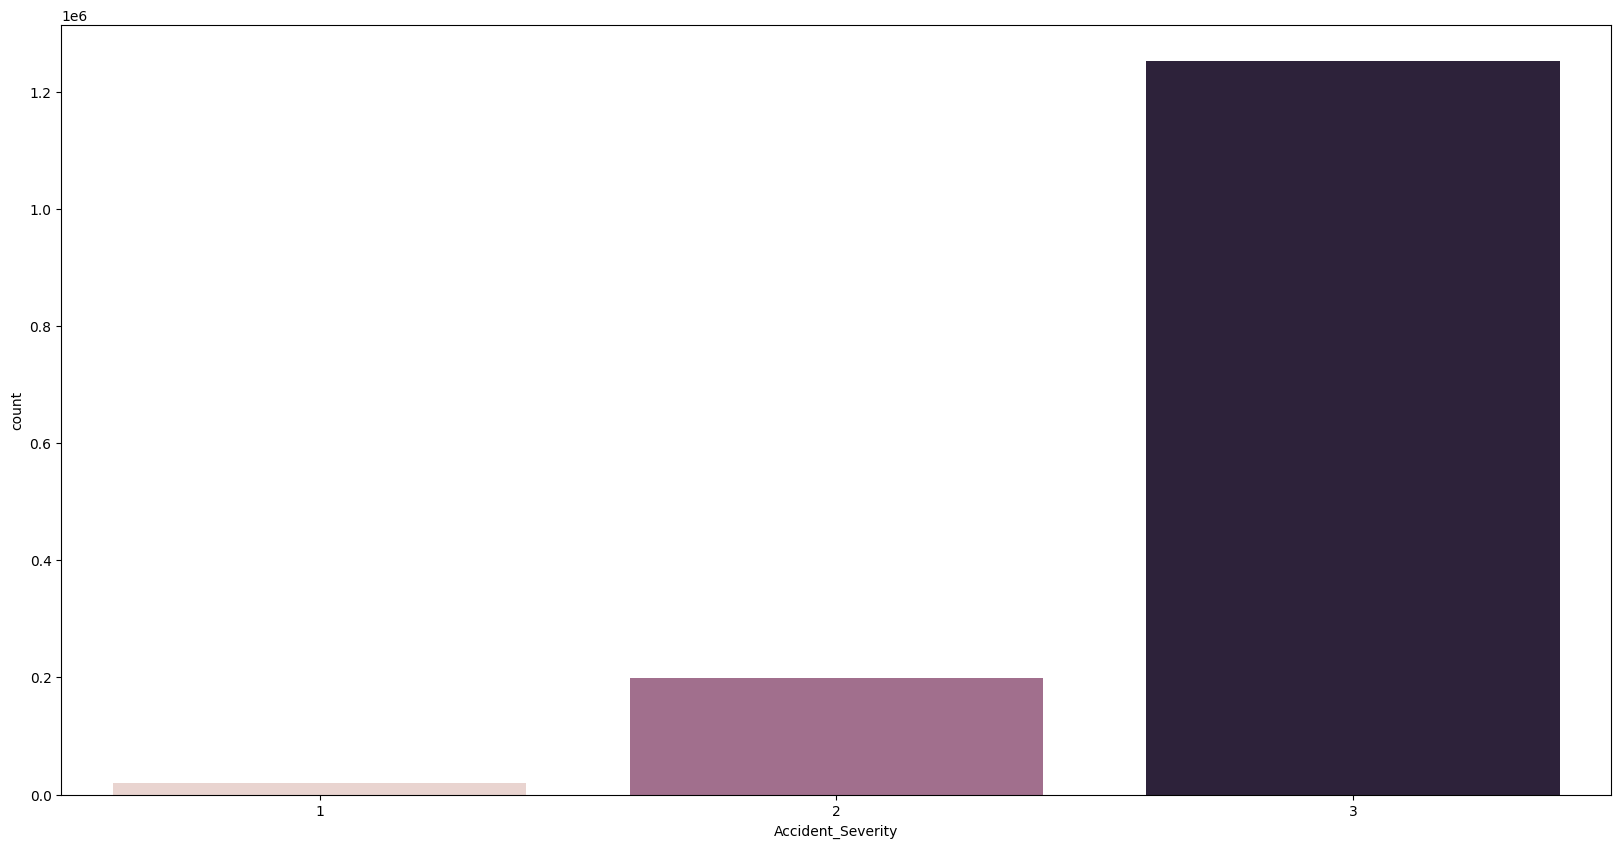

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(
    data_copy,
    x="Accident_Severity",
    hue="Accident_Severity", 
    legend=False)

<Axes: xlabel='Accident_Severity_Index', ylabel='count'>

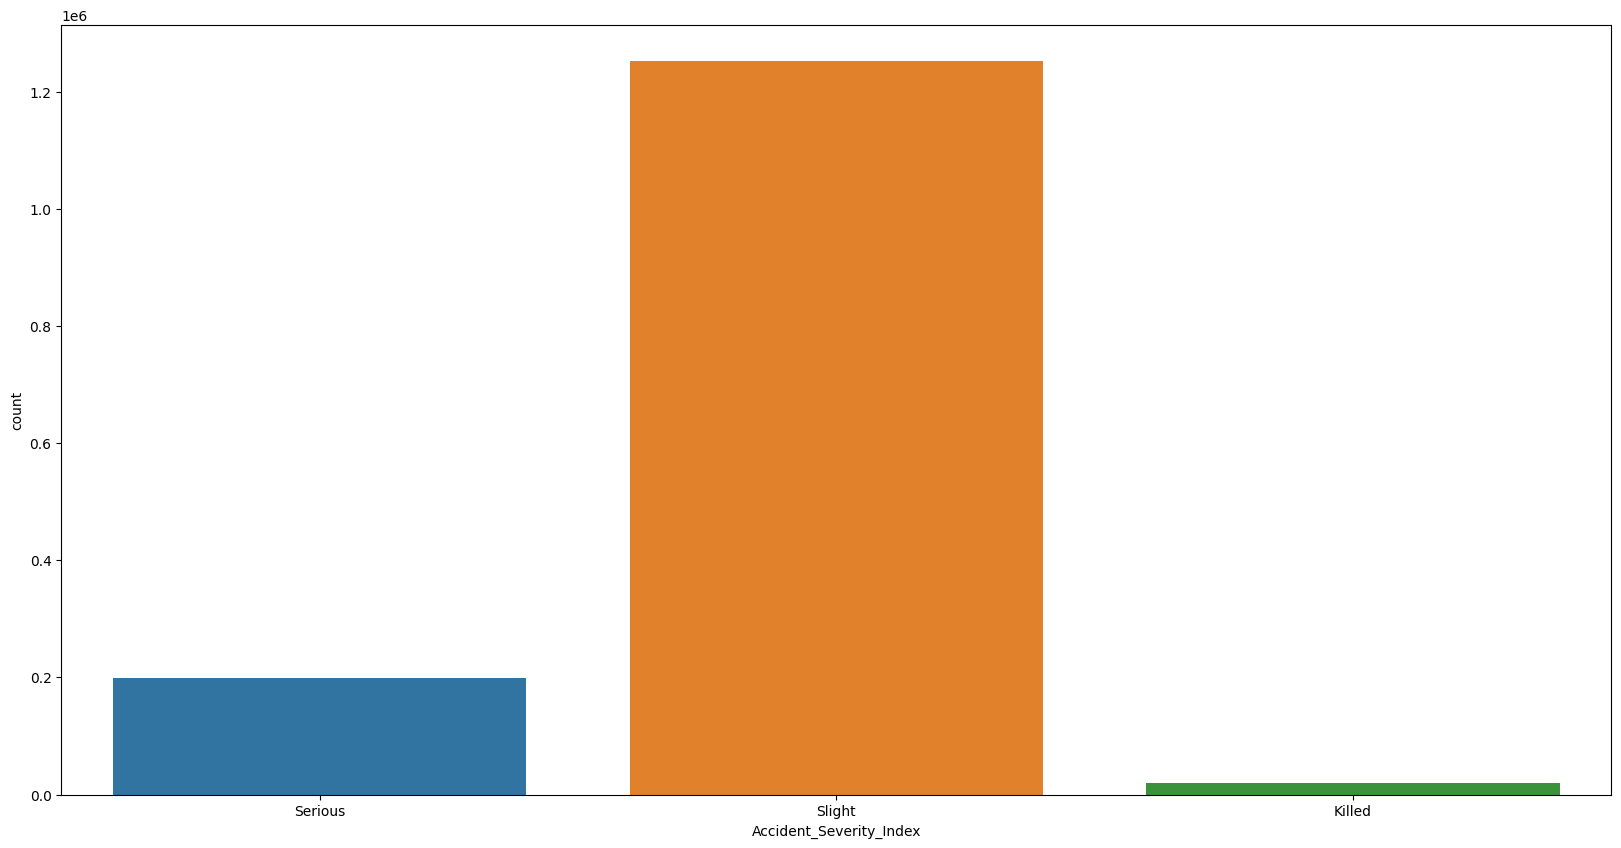

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(
    data_copy,
    x="Accident_Severity_Index",
    hue="Accident_Severity_Index", 
    legend=False)

## Accidents by year and weekdays

In [11]:
mappings = {
    1:"Monday",
    2:"Tuesday", 
    3:"Wednesday",
    4:"Thursday",
    5:"Friday", 
    6:"Saturday",
    7:"Sunday"
}
data_copy1 = data.copy()

data_copy1['Day_of_Week_Index'] = data_copy1["Day_of_Week"].map(mappings)
week1 = data_copy1["Day_of_Week_Index"].value_counts()
sorter = ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
week2 = week1.reindex(sorter)
week2.index

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object', name='Day_of_Week_Index')

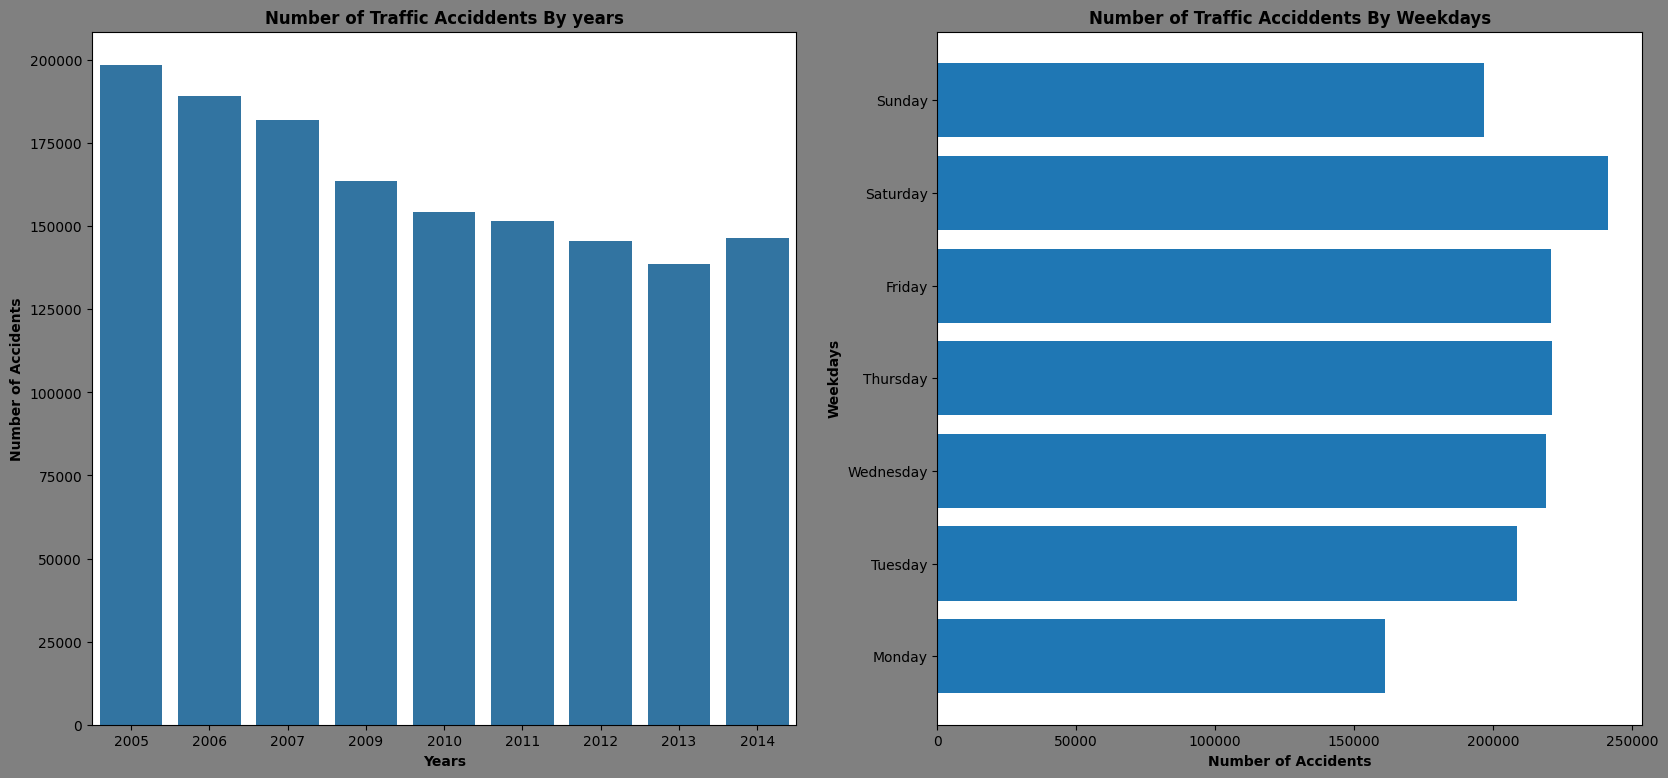

In [12]:
year = data["Year"].value_counts()
week = data["Day_of_Week"].value_counts()
week1 = data_copy1["Day_of_Week_Index"].value_counts()

plt.figure(figsize = (20,9),facecolor='grey')
plt.subplot(1, 2, 1)

sns.barplot(x = year.index, y = year.values)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Years",weight="bold")

plt.title("Number of Traffic Acciddents By years",weight="bold")

plt.subplot(1, 2, 2)

plt.barh(week2.index,week2.values)
plt.title("Number of Traffic Acciddents By Weekdays",weight="bold")
plt.xlabel("Number of Accidents",weight="bold")
plt.ylabel("Weekdays",weight="bold")
plt.show()